## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.037906
0:	learn: 0.9726035	total: 49.8ms	remaining: 49.7s
1:	learn: 0.9401558	total: 50.8ms	remaining: 25.3s
2:	learn: 0.9123537	total: 51.2ms	remaining: 17s
3:	learn: 0.8818191	total: 51.9ms	remaining: 12.9s
4:	learn: 0.8565114	total: 52.4ms	remaining: 10.4s
5:	learn: 0.8284640	total: 53.1ms	remaining: 8.79s
6:	learn: 0.8055109	total: 53.5ms	remaining: 7.59s
7:	learn: 0.7822760	total: 54.1ms	remaining: 6.7s
8:	learn: 0.7566542	total: 54.6ms	remaining: 6.02s
9:	learn: 0.7347980	total: 55.2ms	remaining: 5.46s
10:	learn: 0.7117841	total: 55.8ms	remaining: 5.02s
11:	learn: 0.6898596	total: 56.4ms	remaining: 4.64s
12:	learn: 0.6673750	total: 57ms	remaining: 4.33s
13:	learn: 0.6464609	total: 57.6ms	remaining: 4.05s
14:	learn: 0.6257213	total: 58.2ms	remaining: 3.82s
15:	learn: 0.6062537	total: 58.7ms	remaining: 3.61s
16:	learn: 0.5884768	total: 59.2ms	remaining: 3.42s
17:	learn: 0.5712115	total: 59.7ms	remaining: 3.25s
18:	learn: 0.5538083	total: 60ms	remaining: 3.1s


58:	learn: 0.1909459	total: 81.3ms	remaining: 1.3s
59:	learn: 0.1865995	total: 82.4ms	remaining: 1.29s
60:	learn: 0.1815175	total: 83.1ms	remaining: 1.28s
61:	learn: 0.1782351	total: 83.6ms	remaining: 1.26s
62:	learn: 0.1741215	total: 84.2ms	remaining: 1.25s
63:	learn: 0.1694715	total: 84.7ms	remaining: 1.24s
64:	learn: 0.1665301	total: 85.2ms	remaining: 1.23s
65:	learn: 0.1626470	total: 85.6ms	remaining: 1.21s
66:	learn: 0.1599228	total: 86ms	remaining: 1.2s
67:	learn: 0.1568720	total: 86.5ms	remaining: 1.19s
68:	learn: 0.1531432	total: 87ms	remaining: 1.17s
69:	learn: 0.1492162	total: 87.5ms	remaining: 1.16s
70:	learn: 0.1457530	total: 87.9ms	remaining: 1.15s
71:	learn: 0.1427518	total: 88.4ms	remaining: 1.14s
72:	learn: 0.1396815	total: 88.9ms	remaining: 1.13s
73:	learn: 0.1363953	total: 89.4ms	remaining: 1.12s
74:	learn: 0.1329340	total: 89.9ms	remaining: 1.11s
75:	learn: 0.1298761	total: 90.3ms	remaining: 1.1s
76:	learn: 0.1272670	total: 90.7ms	remaining: 1.09s
77:	learn: 0.124821

187:	learn: 0.0436559	total: 167ms	remaining: 720ms
188:	learn: 0.0435626	total: 170ms	remaining: 730ms
189:	learn: 0.0434426	total: 173ms	remaining: 736ms
190:	learn: 0.0433301	total: 174ms	remaining: 735ms
191:	learn: 0.0432075	total: 175ms	remaining: 734ms
192:	learn: 0.0430483	total: 179ms	remaining: 749ms
193:	learn: 0.0429581	total: 180ms	remaining: 746ms
194:	learn: 0.0428741	total: 180ms	remaining: 744ms
195:	learn: 0.0427662	total: 181ms	remaining: 741ms
196:	learn: 0.0426705	total: 182ms	remaining: 740ms
197:	learn: 0.0424481	total: 182ms	remaining: 737ms
198:	learn: 0.0423083	total: 183ms	remaining: 735ms
199:	learn: 0.0422194	total: 184ms	remaining: 735ms
200:	learn: 0.0420943	total: 184ms	remaining: 733ms
201:	learn: 0.0419236	total: 185ms	remaining: 732ms
202:	learn: 0.0416570	total: 186ms	remaining: 730ms
203:	learn: 0.0414997	total: 187ms	remaining: 728ms
204:	learn: 0.0413369	total: 187ms	remaining: 726ms
205:	learn: 0.0411986	total: 188ms	remaining: 723ms
206:	learn: 

230:	learn: 0.0377672	total: 218ms	remaining: 725ms
231:	learn: 0.0377074	total: 218ms	remaining: 722ms
232:	learn: 0.0374715	total: 219ms	remaining: 722ms
233:	learn: 0.0372949	total: 220ms	remaining: 721ms
234:	learn: 0.0371819	total: 221ms	remaining: 719ms
235:	learn: 0.0370905	total: 222ms	remaining: 719ms
236:	learn: 0.0370082	total: 222ms	remaining: 716ms
237:	learn: 0.0368357	total: 224ms	remaining: 716ms
238:	learn: 0.0367720	total: 224ms	remaining: 715ms
239:	learn: 0.0366714	total: 225ms	remaining: 714ms
240:	learn: 0.0365861	total: 226ms	remaining: 712ms
241:	learn: 0.0365344	total: 227ms	remaining: 710ms
242:	learn: 0.0364839	total: 227ms	remaining: 708ms
243:	learn: 0.0363530	total: 228ms	remaining: 705ms
244:	learn: 0.0362383	total: 229ms	remaining: 705ms
245:	learn: 0.0360705	total: 229ms	remaining: 702ms
246:	learn: 0.0359673	total: 230ms	remaining: 700ms
247:	learn: 0.0358511	total: 231ms	remaining: 699ms
248:	learn: 0.0356989	total: 231ms	remaining: 697ms
249:	learn: 

324:	learn: 0.0289513	total: 310ms	remaining: 643ms
325:	learn: 0.0288480	total: 315ms	remaining: 652ms
326:	learn: 0.0288015	total: 316ms	remaining: 650ms
327:	learn: 0.0287337	total: 316ms	remaining: 648ms
328:	learn: 0.0286895	total: 317ms	remaining: 646ms
329:	learn: 0.0286217	total: 317ms	remaining: 644ms
330:	learn: 0.0285795	total: 323ms	remaining: 652ms
331:	learn: 0.0285045	total: 325ms	remaining: 654ms
332:	learn: 0.0284320	total: 326ms	remaining: 653ms
333:	learn: 0.0283649	total: 326ms	remaining: 651ms
334:	learn: 0.0282951	total: 327ms	remaining: 649ms
335:	learn: 0.0281995	total: 327ms	remaining: 647ms
336:	learn: 0.0281327	total: 329ms	remaining: 647ms
337:	learn: 0.0280561	total: 330ms	remaining: 645ms
338:	learn: 0.0279913	total: 330ms	remaining: 643ms
339:	learn: 0.0279204	total: 330ms	remaining: 641ms
340:	learn: 0.0278642	total: 337ms	remaining: 651ms
341:	learn: 0.0278101	total: 337ms	remaining: 649ms
342:	learn: 0.0277928	total: 338ms	remaining: 647ms
343:	learn: 

364:	learn: 0.0265663	total: 356ms	remaining: 619ms
365:	learn: 0.0265455	total: 359ms	remaining: 621ms
366:	learn: 0.0265107	total: 361ms	remaining: 623ms
367:	learn: 0.0264432	total: 363ms	remaining: 623ms
368:	learn: 0.0263907	total: 365ms	remaining: 624ms
369:	learn: 0.0263355	total: 366ms	remaining: 622ms
370:	learn: 0.0262943	total: 366ms	remaining: 621ms
371:	learn: 0.0262111	total: 367ms	remaining: 620ms
372:	learn: 0.0261364	total: 368ms	remaining: 619ms
373:	learn: 0.0260812	total: 369ms	remaining: 617ms
374:	learn: 0.0260513	total: 369ms	remaining: 615ms
375:	learn: 0.0260223	total: 370ms	remaining: 614ms
376:	learn: 0.0259956	total: 371ms	remaining: 613ms
377:	learn: 0.0259351	total: 373ms	remaining: 613ms
378:	learn: 0.0258800	total: 373ms	remaining: 612ms
379:	learn: 0.0258201	total: 375ms	remaining: 611ms
380:	learn: 0.0257674	total: 376ms	remaining: 611ms
381:	learn: 0.0257092	total: 378ms	remaining: 611ms
382:	learn: 0.0256565	total: 378ms	remaining: 610ms
383:	learn: 

443:	learn: 0.0231402	total: 513ms	remaining: 643ms


444:	learn: 0.0230887	total: 567ms	remaining: 708ms
445:	learn: 0.0230676	total: 568ms	remaining: 705ms
446:	learn: 0.0230471	total: 570ms	remaining: 705ms
447:	learn: 0.0230056	total: 574ms	remaining: 708ms
448:	learn: 0.0229852	total: 576ms	remaining: 707ms
449:	learn: 0.0229472	total: 576ms	remaining: 704ms
450:	learn: 0.0229102	total: 583ms	remaining: 710ms
451:	learn: 0.0228897	total: 587ms	remaining: 712ms
452:	learn: 0.0228644	total: 588ms	remaining: 710ms
453:	learn: 0.0228266	total: 589ms	remaining: 708ms
454:	learn: 0.0227878	total: 591ms	remaining: 708ms
455:	learn: 0.0227645	total: 593ms	remaining: 707ms
456:	learn: 0.0227410	total: 593ms	remaining: 705ms
457:	learn: 0.0227164	total: 594ms	remaining: 703ms
458:	learn: 0.0226698	total: 594ms	remaining: 700ms
459:	learn: 0.0226450	total: 596ms	remaining: 700ms
460:	learn: 0.0226060	total: 597ms	remaining: 698ms
461:	learn: 0.0225882	total: 598ms	remaining: 697ms
462:	learn: 0.0225516	total: 599ms	remaining: 694ms
463:	learn: 

513:	learn: 0.0210686	total: 657ms	remaining: 621ms
514:	learn: 0.0210357	total: 658ms	remaining: 620ms
515:	learn: 0.0210193	total: 659ms	remaining: 618ms
516:	learn: 0.0209912	total: 659ms	remaining: 616ms
517:	learn: 0.0209746	total: 660ms	remaining: 614ms
518:	learn: 0.0209604	total: 660ms	remaining: 612ms
519:	learn: 0.0209364	total: 661ms	remaining: 610ms
520:	learn: 0.0209170	total: 661ms	remaining: 608ms
521:	learn: 0.0209009	total: 662ms	remaining: 606ms
522:	learn: 0.0208684	total: 663ms	remaining: 605ms


523:	learn: 0.0208376	total: 666ms	remaining: 605ms
524:	learn: 0.0208137	total: 667ms	remaining: 603ms
525:	learn: 0.0207848	total: 668ms	remaining: 602ms
526:	learn: 0.0207519	total: 670ms	remaining: 601ms
527:	learn: 0.0207409	total: 671ms	remaining: 600ms
528:	learn: 0.0207173	total: 674ms	remaining: 600ms
529:	learn: 0.0207053	total: 675ms	remaining: 598ms
530:	learn: 0.0206874	total: 675ms	remaining: 596ms
531:	learn: 0.0206714	total: 676ms	remaining: 595ms
532:	learn: 0.0206549	total: 677ms	remaining: 593ms
533:	learn: 0.0206261	total: 677ms	remaining: 591ms
534:	learn: 0.0206037	total: 678ms	remaining: 589ms
535:	learn: 0.0205843	total: 678ms	remaining: 587ms
536:	learn: 0.0205528	total: 679ms	remaining: 586ms
537:	learn: 0.0205326	total: 679ms	remaining: 583ms
538:	learn: 0.0204965	total: 680ms	remaining: 582ms
539:	learn: 0.0204769	total: 681ms	remaining: 580ms
540:	learn: 0.0204609	total: 681ms	remaining: 578ms
541:	learn: 0.0204299	total: 682ms	remaining: 576ms
542:	learn: 

600:	learn: 0.0191126	total: 724ms	remaining: 481ms
601:	learn: 0.0190949	total: 725ms	remaining: 479ms
602:	learn: 0.0190756	total: 725ms	remaining: 477ms
603:	learn: 0.0190472	total: 726ms	remaining: 476ms
604:	learn: 0.0190184	total: 726ms	remaining: 474ms
605:	learn: 0.0190062	total: 727ms	remaining: 473ms
606:	learn: 0.0189817	total: 727ms	remaining: 471ms
607:	learn: 0.0189654	total: 728ms	remaining: 469ms
608:	learn: 0.0189414	total: 728ms	remaining: 468ms
609:	learn: 0.0189144	total: 729ms	remaining: 466ms
610:	learn: 0.0188859	total: 729ms	remaining: 464ms
611:	learn: 0.0188628	total: 730ms	remaining: 463ms
612:	learn: 0.0188391	total: 730ms	remaining: 461ms
613:	learn: 0.0188232	total: 731ms	remaining: 459ms
614:	learn: 0.0187926	total: 731ms	remaining: 458ms
615:	learn: 0.0187701	total: 733ms	remaining: 457ms
616:	learn: 0.0187418	total: 733ms	remaining: 455ms
617:	learn: 0.0187259	total: 734ms	remaining: 454ms
618:	learn: 0.0186998	total: 734ms	remaining: 452ms
619:	learn: 

695:	learn: 0.0173029	total: 773ms	remaining: 338ms
696:	learn: 0.0172835	total: 774ms	remaining: 337ms
697:	learn: 0.0172663	total: 775ms	remaining: 335ms
698:	learn: 0.0172592	total: 776ms	remaining: 334ms
699:	learn: 0.0172417	total: 776ms	remaining: 333ms
700:	learn: 0.0172238	total: 777ms	remaining: 331ms
701:	learn: 0.0172095	total: 777ms	remaining: 330ms
702:	learn: 0.0171849	total: 777ms	remaining: 328ms
703:	learn: 0.0171657	total: 778ms	remaining: 327ms
704:	learn: 0.0171455	total: 778ms	remaining: 326ms
705:	learn: 0.0171347	total: 779ms	remaining: 324ms
706:	learn: 0.0171240	total: 779ms	remaining: 323ms
707:	learn: 0.0171052	total: 780ms	remaining: 322ms
708:	learn: 0.0170991	total: 780ms	remaining: 320ms
709:	learn: 0.0170799	total: 781ms	remaining: 319ms
710:	learn: 0.0170637	total: 781ms	remaining: 318ms
711:	learn: 0.0170487	total: 782ms	remaining: 316ms
712:	learn: 0.0170282	total: 782ms	remaining: 315ms
713:	learn: 0.0170072	total: 783ms	remaining: 314ms
714:	learn: 

823:	learn: 0.0154440	total: 881ms	remaining: 188ms
824:	learn: 0.0154374	total: 881ms	remaining: 187ms
825:	learn: 0.0154231	total: 883ms	remaining: 186ms
826:	learn: 0.0154142	total: 883ms	remaining: 185ms
827:	learn: 0.0154066	total: 886ms	remaining: 184ms
828:	learn: 0.0153859	total: 887ms	remaining: 183ms
829:	learn: 0.0153759	total: 887ms	remaining: 182ms
830:	learn: 0.0153675	total: 888ms	remaining: 181ms
831:	learn: 0.0153597	total: 889ms	remaining: 179ms
832:	learn: 0.0153487	total: 890ms	remaining: 178ms
833:	learn: 0.0153387	total: 891ms	remaining: 177ms
834:	learn: 0.0153237	total: 892ms	remaining: 176ms
835:	learn: 0.0153164	total: 892ms	remaining: 175ms
836:	learn: 0.0152976	total: 893ms	remaining: 174ms
837:	learn: 0.0152905	total: 898ms	remaining: 174ms
838:	learn: 0.0152770	total: 900ms	remaining: 173ms


839:	learn: 0.0152593	total: 902ms	remaining: 172ms
840:	learn: 0.0152492	total: 904ms	remaining: 171ms
841:	learn: 0.0152333	total: 904ms	remaining: 170ms
842:	learn: 0.0152237	total: 906ms	remaining: 169ms
843:	learn: 0.0151956	total: 907ms	remaining: 168ms
844:	learn: 0.0151750	total: 908ms	remaining: 167ms
845:	learn: 0.0151595	total: 910ms	remaining: 166ms
846:	learn: 0.0151449	total: 911ms	remaining: 165ms
847:	learn: 0.0151381	total: 913ms	remaining: 164ms
848:	learn: 0.0151201	total: 914ms	remaining: 163ms
849:	learn: 0.0151125	total: 914ms	remaining: 161ms
850:	learn: 0.0151080	total: 916ms	remaining: 160ms
851:	learn: 0.0150928	total: 918ms	remaining: 159ms
852:	learn: 0.0150780	total: 919ms	remaining: 158ms
853:	learn: 0.0150719	total: 921ms	remaining: 157ms
854:	learn: 0.0150669	total: 922ms	remaining: 156ms
855:	learn: 0.0150452	total: 923ms	remaining: 155ms
856:	learn: 0.0150366	total: 924ms	remaining: 154ms
857:	learn: 0.0150202	total: 925ms	remaining: 153ms
858:	learn: 

981:	learn: 0.0137106	total: 1s	remaining: 18.3ms
982:	learn: 0.0137036	total: 1s	remaining: 17.3ms
983:	learn: 0.0136944	total: 1s	remaining: 16.3ms
984:	learn: 0.0136817	total: 1s	remaining: 15.3ms
985:	learn: 0.0136790	total: 1s	remaining: 14.2ms
986:	learn: 0.0136707	total: 1s	remaining: 13.2ms
987:	learn: 0.0136645	total: 1s	remaining: 12.2ms
988:	learn: 0.0136552	total: 1s	remaining: 11.2ms
989:	learn: 0.0136394	total: 1s	remaining: 10.2ms
990:	learn: 0.0136316	total: 1.01s	remaining: 9.14ms
991:	learn: 0.0136225	total: 1.01s	remaining: 8.12ms
992:	learn: 0.0136127	total: 1.01s	remaining: 7.1ms
993:	learn: 0.0136062	total: 1.01s	remaining: 6.08ms
994:	learn: 0.0136035	total: 1.01s	remaining: 5.07ms
995:	learn: 0.0135902	total: 1.01s	remaining: 4.05ms
996:	learn: 0.0135771	total: 1.01s	remaining: 3.04ms
997:	learn: 0.0135699	total: 1.01s	remaining: 2.02ms
998:	learn: 0.0135596	total: 1.01s	remaining: 1.01ms
999:	learn: 0.0135454	total: 1.01s	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.022131235729072943
ABC Pre-generator MAE 0.025674469861029406


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

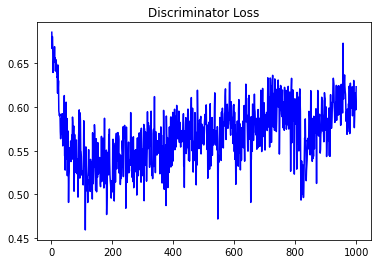

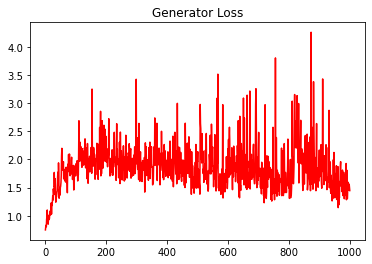

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.03546163614331321


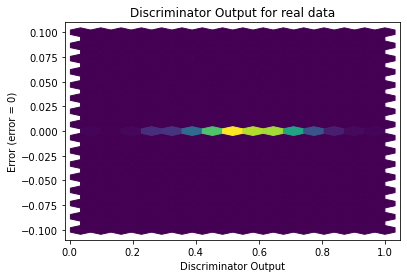

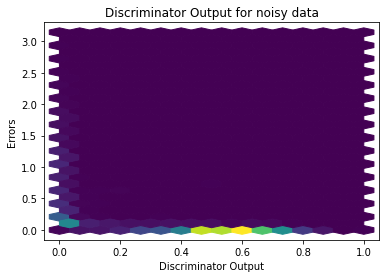

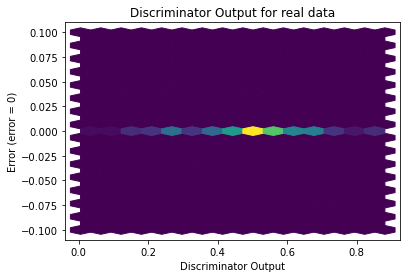

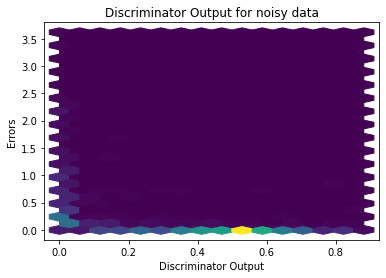

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


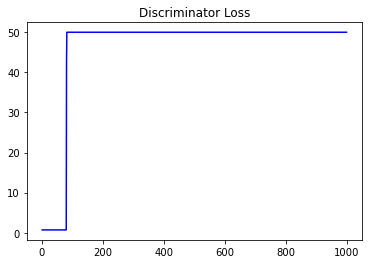

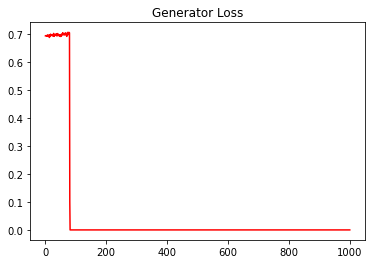

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
23647.03248136192


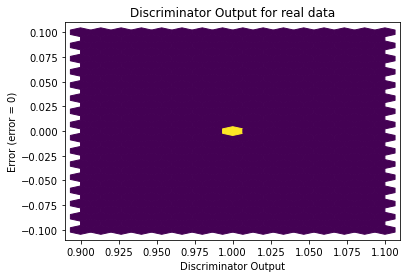

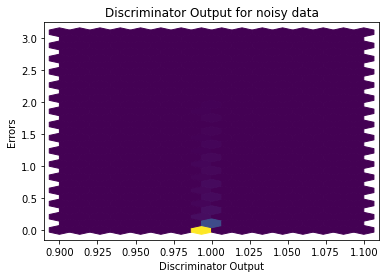

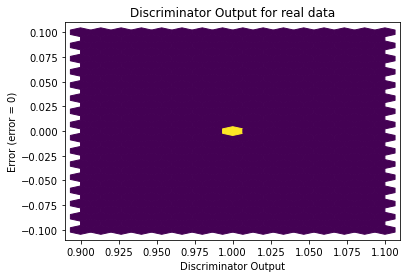

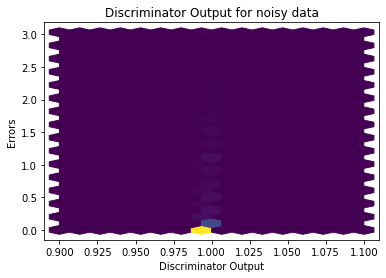

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

In [ ]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())